
# Training a Decision Tree or a Random Forest on a classification problem, and compare the latter with using adaBoost

**Author: Pr Fabien MOUTARDE, Center for Robotics, MINES Paris, PSL Université**


*Pratical Session completed by Alexandra Baron.*

## 1. Decision Trees with SciKit-Learn on a very simple dataset

**We will first work on very simple classic dataset: Iris, which is a classification problem corresponding to determination of iris flower sub-species based on a few geometric characteristics of the flower.**

**Please FIRST READ the [*Iris DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py).**
In this classification problem, there are 3 classes, with a total of 150 examples (each one with 4 input). Please **now execute code cell below to load and view the dataset**.


In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Load Iris classification dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Print all 150 examples
print("(Number_of_examples, example_size) = " , iris.data.shape, "\n")
for i in range(0, 150) :
    print('Input = ', iris.data[i], ' , Label = ', iris.target[i] )


(Number_of_examples, example_size) =  (150, 4) 

Input =  [5.1 3.5 1.4 0.2]  , Label =  0
Input =  [4.9 3.  1.4 0.2]  , Label =  0
Input =  [4.7 3.2 1.3 0.2]  , Label =  0
Input =  [4.6 3.1 1.5 0.2]  , Label =  0
Input =  [5.  3.6 1.4 0.2]  , Label =  0
Input =  [5.4 3.9 1.7 0.4]  , Label =  0
Input =  [4.6 3.4 1.4 0.3]  , Label =  0
Input =  [5.  3.4 1.5 0.2]  , Label =  0
Input =  [4.4 2.9 1.4 0.2]  , Label =  0
Input =  [4.9 3.1 1.5 0.1]  , Label =  0
Input =  [5.4 3.7 1.5 0.2]  , Label =  0
Input =  [4.8 3.4 1.6 0.2]  , Label =  0
Input =  [4.8 3.  1.4 0.1]  , Label =  0
Input =  [4.3 3.  1.1 0.1]  , Label =  0
Input =  [5.8 4.  1.2 0.2]  , Label =  0
Input =  [5.7 4.4 1.5 0.4]  , Label =  0
Input =  [5.4 3.9 1.3 0.4]  , Label =  0
Input =  [5.1 3.5 1.4 0.3]  , Label =  0
Input =  [5.7 3.8 1.7 0.3]  , Label =  0
Input =  [5.1 3.8 1.5 0.3]  , Label =  0
Input =  [5.4 3.4 1.7 0.2]  , Label =  0
Input =  [5.1 3.7 1.5 0.4]  , Label =  0
Input =  [4.6 3.6 1.  0.2]  , Label =  0
Input = 

**Building, training and evaluating a simple Decision Tree classifier**

The SciKit-learn class for Decision Tree classifiers is sklearn.tree.DecisionTreeClassifier.

**Please FIRST READ (and understand!) the [*DecisionTreeClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to understand all parameters of the contructor.**

**You can then begin by running the code block below, in which default set of parameter values has been used.** If graphical view works, look at the structure of the learnt decision tree.

**Then, check the influence of MAIN parameters for Decision Tree classifier, i.e.:**
 - **homegeneity criterion ('gini' or 'entropy')**
 - **max_depth**
 - **min_samples_split**

NB : Note that post-training *PRUNING* IS unfortunately *NOT* implemented in SciKit-Learn Decision-Trees :(

DecisionTreeClassifier(criterion='entropy', max_depth=5)
Acuracy (on test set) =  0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.90      0.75      0.82        12
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.92      0.91      0.91        45


 CONFUSION MATRIX
[[20  0  0]
 [ 0  9  3]
 [ 0  1 12]]


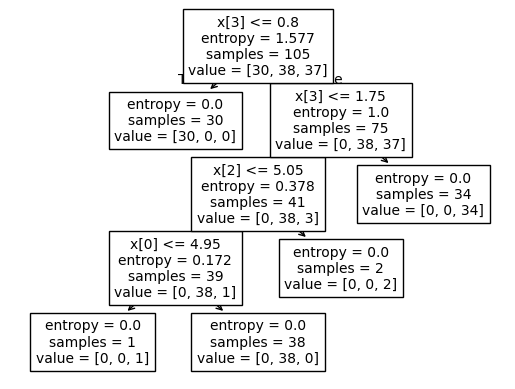

In [2]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test part
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Learn a Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5,
                                  min_samples_split=2, min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0, max_features=None,
                                  random_state=None, max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
clf = clf.fit(X_train, y_train)

# Graphical view of learnt Decision Tree
tree.plot_tree(clf)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


## 2. Decision Trees on a  MORE REALISTIC DATASET: HANDWRITTEN DIGITS

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**

In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). Please **now execute code cell below to load the dataset, visualize a typical example, and train a Desicion Tree on it**.
The original code uses a **voluntarily SUBOPTIMAL set of learning hyperparameters values, which reaches ~66% test acuracy. Try to play with them in order to improve acuracy.**


Number_of-examples =  1797

 Plot of first example


<Figure size 640x480 with 0 Axes>

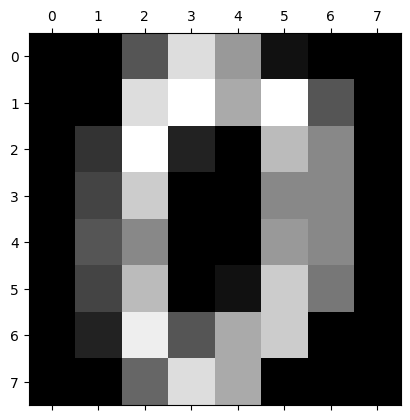

DecisionTreeClassifier(max_depth=5, min_samples_split=4)
Acuracy (on test set) =  0.6596218020022246
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        84
           1       0.65      0.16      0.26        92
           2       0.31      0.24      0.27        89
           3       0.47      0.76      0.58        87
           4       0.92      0.78      0.84        89
           5       0.96      0.86      0.91        91
           6       0.92      0.90      0.91        87
           7       0.75      0.92      0.82        96
           8       0.34      0.76      0.47        85
           9       0.94      0.32      0.48        99

    accuracy                           0.66       899
   macro avg       0.72      0.67      0.65       899
weighted avg       0.73      0.66      0.65       899


 CONFUSION MATRIX
[[81  1  1  0  0  1  0  0  0  0]
 [ 0 15 22  9  3  0  0  3 40  0]
 [ 0  1 21  2  0  0  3  0 62  0]
 [ 0  0  5 66  0  0  0

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray()
plt.matshow(digits.images[0])
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

# Split dataset into training and test part
X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Create and train a Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5,
                                  min_samples_split=4, min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0, max_features=None,
                                  random_state=None, max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
clf = clf.fit(X_train, y_train)


# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


__Question: According to the confusion matrices, what digits are the most confused with each other?__

__Answer:__ *Looking at the confusion matrix, the most significant confusions are:*
- *Digit **1** is heavily confused with digit **8** (61 out of 93 instances of digit 1 were misclassified as 8), which is by far the largest confusion.*
- *Digit **5** is often confused with digit **9** (35 instances).*
- *Digit **6** shows confusion with digit **2** (24 instances) and digit **8** (19 instances).*
- *Digit **8** is confused with digit **2** (17 instances).*

*These confusions are visually understandable since handwritten versions of these digit pairs can share similar features (e.g., 1 and 8 can both have vertical strokes, 5 and 9 have curved lower parts).*

**Finally, find somewhat optimized values for the set of 3 main hyper-parameters for DecisionTree learning, by using GRID-SEARCH WITH CROSS-VALIDATION** (see cross-validation example from the Multi-Layer Perceptron notebook used in earlier practical session). __Put the code in the cell below:__

In [4]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Create Decision Tree classifier
dt_clf = tree.DecisionTreeClassifier(random_state=42)

# Perform Grid Search with Cross Validation
grid_search_dt = GridSearchCV(dt_clf, param_grid_dt, cv=5,
                              scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_dt.best_score_))

# Evaluate on test set with best model
best_dt = grid_search_dt.best_estimator_
test_score_dt = best_dt.score(X_test, y_test)
print("Test accuracy with best parameters: {:.4f}".format(test_score_dt))

# Show detailed results
y_true, y_pred = y_test, best_dt.predict(X_test)
print("\n", classification_report(y_true, y_pred))
print("\n CONFUSION MATRIX")
print(confusion_matrix(y_true, y_pred))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: 0.8163
Test accuracy with best parameters: 0.8343

               precision    recall  f1-score   support

           0       0.88      0.98      0.93        84
           1       0.69      0.74      0.71        92
           2       0.83      0.80      0.81        89
           3       0.85      0.78      0.81        87
           4       0.90      0.80      0.85        89
           5       0.92      0.85      0.88        91
           6       0.85      0.91      0.88        87
           7       0.87      0.90      0.88        96
           8       0.77      0.71      0.74        85
           9       0.81      0.89      0.85        99

    accuracy                           0.83       899
   macro avg       0.84      0.83      0.83       899
weighted avg       0.84      0.83      0.8

__Question: What best value have you managed to reach for TEST accuracy of your DecisionTree after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer:__ *After performing grid search with cross-validation, the best test accuracy achieved is **83.43%**. The optimal hyperparameters found are: criterion='gini', max_depth=15, min_samples_leaf=1, and min_samples_split=5, with a cross-validation score of 81.63%.*

*This represents a significant improvement over the initial suboptimal configuration (which had only ~63% accuracy). The optimized Decision Tree shows balanced performance across all digit classes, with precision ranging from 69% to 92% and recall from 71% to 98%.* 

*However, some confusion remains between certain digit pairs, particularly digit 1 (74% recall) and digit 8 (71% recall). Even with optimized hyperparameters, a single Decision Tree has inherent limitations due to high variance, which motivates the use of ensemble methods like Random Forest to improve generalization.*


In order to improve result, the most natural step is to combine SEVERAL decision trees, using the Ensemble model called Random Forest: see below

## 3. Building, training and evaluating a Random Forest classifier

The SciKit-learn class for Random Forest classifiers is sklearn.ensemble.RandomForestClassifier.

**Please FIRST READ (and understand!) the [*RandomForestClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to understand all parameters of the contructor.**

**Then you can begin by running the code block below, in which default set of parameter values has been used.** As you will see, a RandomForest (even rather small) can easily outperform single Decision Tree.

**Then, check the influence of MAIN parameters for Random Forest classifier, i.e.:**
 - **n_estimators (number of trees in forest)**
 - **max_depth**
 - **max_features (max number of features used in each tree)**


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                             min_samples_split=2, min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0, max_features='sqrt',
                             max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True,
                             oob_score=False, n_jobs=1, random_state=None,
                             verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0)

clf = clf.fit(X_train, y_train)
print("n_estimators=", clf.n_estimators, " max_depth=",clf.max_depth,
      " max_features=", clf.max_features)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


n_estimators= 10  max_depth= None  max_features= sqrt
RandomForestClassifier(n_estimators=10, n_jobs=1)
Acuracy (on test set) =  0.9365962180200222
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       0.91      0.96      0.93        92
           2       0.98      0.97      0.97        89
           3       0.95      0.91      0.93        87
           4       0.95      0.93      0.94        89
           5       0.88      0.95      0.91        91
           6       0.98      0.95      0.97        87
           7       0.96      0.98      0.97        96
           8       0.88      0.84      0.86        85
           9       0.92      0.89      0.90        99

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899


 CONFUSION MATRIX
[[84  0  0  0  0  0  0  0  0  0]
 [ 0 88  0  0  0  2  0  0  1  1]
 [ 0  2 

**Finally, find somewhat optimized values the set of 3 main hyper-parameters for RandomForest, by using CROSS-VALIDATION** (see cross-validation example from the Multi-Layer Perceptron notebook used in earlier practical session). __Put the code in the cell below:__

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 30, 50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10]
}

# Create Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross Validation
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5,
                              scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_rf.best_score_))

# Evaluate on test set with best model
best_rf = grid_search_rf.best_estimator_
test_score_rf = best_rf.score(X_test, y_test)
print("Test accuracy with best parameters: {:.4f}".format(test_score_rf))

# Show detailed results
y_true, y_pred = y_test, best_rf.predict(X_test)
print("\n", classification_report(y_true, y_pred))
print("\n CONFUSION MATRIX")
print(confusion_matrix(y_true, y_pred))


Fitting 5 folds for each of 180 candidates, totalling 900 fits


__Question: What best value have you managed to reach for TEST accuracy of your RandomForest after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer:__ *After performing grid search with cross-validation (that took more than 4 min), the best test accuracy achieved is **97.00%**. The optimal hyperparameters found are: n_estimators=150, max_depth=10, max_features='sqrt', and min_samples_split=2, with a cross-validation score of 96.66%.*

*This represents a dramatic improvement over the single Decision Tree (83.43%). The optimized Random Forest shows excellent and consistent performance across all digit classes, with precision and recall both ranging from 94% to 99% for most classes. The confusion matrix reveals very few misclassifications, with particularly perfect performance on digits 1 (100% recall) and 7 (100% recall).*

## 3. Building, training and evaluating an AdaBoost classifier

The SciKit-learn class for adaBoost is sklearn.ensemble.AdaBoostClassifier.

**Please FIRST READ (and understand!) the [*AdaBoostClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) to understand all parameters of the contructor.**

**Then begin by running the code block below, in which a default set of parameter values has been used.**

**Then, check the influence of MAIN parameters for adaBoost classifier, i.e.:**
 - **estimator (ie type of Weak Classifier/Learner)**
 - **n_estimators (number of boosting iterations, and therefore also number of weak classifiers)**
 - algorithm

**Finally, check which other types of classifiers can be used as Weak Classifier with the adaBoost implementation of SciKit-Learn.**
NB: in principle it is possible to use MLP classifiers as weak classifiers, but not with SciKit-learn implementation of MLPClassifier (because weighting of examples is not handled by its implementation).

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create and train an adaBoost classifier using SMALL Decision Trees as weak classifiers
weak_learner = tree.DecisionTreeClassifier(max_depth=6)
clf = AdaBoostClassifier(weak_learner, n_estimators=15, learning_rate=1.0,
                         random_state=None)
clf = clf.fit(X_train, y_train)
print("Weak_learner:", clf.estimator)
print("Weights of weak classifiers: ", clf.estimator_weights_)

# Plot training curves (error = f(iterations))
n_iter = clf.n_estimators
from sklearn.metrics import zero_one_loss
ada_train_err = np.zeros((clf.n_estimators,))
for i, y_pred in enumerate(clf.staged_predict(X_train)):
    ada_train_err[i] = zero_one_loss(y_pred, y_train)
ada_test_err = np.zeros((clf.n_estimators,))
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    ada_test_err[i] = zero_one_loss(y_pred, y_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(n_iter) + 1, ada_train_err,
        label='Training Error',
        color='green')
ax.plot(np.arange(n_iter) + 1, ada_test_err,
        label='Test Error',
        color='orange')
ax.set_ylim((0.0, 0.5))
ax.set_xlabel('boosting iterations')
ax.set_ylabel('error rate')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()

# Evaluate acuracy on test data
print("n_estimators=", clf.n_estimators)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

__Question:__ Looking at the training curves, you can see that **training error goes down to zero rather quickly, but that test_error still continues, after training error is zero, to diminish with increasing iterations**. __Is it normal, and why?__ (check the course!)

__Answer:__ *Yes, this is normal and is a remarkable property of AdaBoost! While this behavior might seem counterintuitive (as it appears to violate the typical bias-variance tradeoff), it is actually well-documented.*

*The explanation is that AdaBoost doesn't just minimize the training error, but also works to increase the **margin** of correct classifications. Even after achieving zero training error, AdaBoost continues to push the decision boundary further from the training points, increasing the confidence of predictions. This increased margin improves generalization and reduces test error.*

*This phenomenon demonstrates that AdaBoost is resistant to overfitting, as long as the weak learners are not too complex. The algorithm continues to improve the "strength" of classification even when no training examples are misclassified, which benefits the test performance.*

**Now, for the case of _DecisionTree_ weak classifiers, find somewhat optimized values of (max_depth, n_estimators) by using CROSS-VALIDATION.** __Put the code below:__

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for AdaBoost with Decision Tree weak learners
param_grid_ada = {
    'estimator__max_depth': [3, 5, 7, 10, 15],
    'n_estimators': [10, 30, 50, 100, 150, 200],
    'learning_rate': [0.5, 0.8, 1.0, 1.5]
}

# Create AdaBoost classifier with Decision Tree as weak learner
weak_learner_base = tree.DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(estimator=weak_learner_base, random_state=42)

# Perform Grid Search with Cross Validation
grid_search_ada = GridSearchCV(ada_clf, param_grid_ada, cv=5,
                               scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_ada.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found: ", grid_search_ada.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_ada.best_score_))

# Evaluate on test set with best model
best_ada = grid_search_ada.best_estimator_
test_score_ada = best_ada.score(X_test, y_test)
print("Test accuracy with best parameters: {:.4f}".format(test_score_ada))

# Show detailed results
y_true, y_pred = y_test, best_ada.predict(X_test)
print("\n", classification_report(y_true, y_pred))
print("\n CONFUSION MATRIX")
print(confusion_matrix(y_true, y_pred))

# Plot training curves for best model
n_iter = best_ada.n_estimators
ada_train_err_best = np.zeros((n_iter,))
for i, y_pred in enumerate(best_ada.staged_predict(X_train)):
    ada_train_err_best[i] = zero_one_loss(y_pred, y_train)
ada_test_err_best = np.zeros((n_iter,))
for i, y_pred in enumerate(best_ada.staged_predict(X_test)):
    ada_test_err_best[i] = zero_one_loss(y_pred, y_test)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(n_iter) + 1, ada_train_err_best,
        label='Training Error',
        color='green')
ax.plot(np.arange(n_iter) + 1, ada_test_err_best,
        label='Test Error',
        color='orange')
ax.set_ylim((0.0, 0.5))
ax.set_xlabel('boosting iterations')
ax.set_ylabel('error rate')
leg = ax.legend(loc='upper right', fancybox=True)
plt.title('Training curves for optimized AdaBoost')
plt.show()


__Question: What best value have you managed to reach for TEST accuracy of your AdaboostClassifier after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer:__ *After performing grid search with cross-validation, the best test accuracy achieved is **97.33%**. The optimal hyperparameters found are: max_depth=7 for weak learners, n_estimators=150, and learning_rate=1.0, with an impressive cross-validation score of 98.00%.*

*This performance is very comparable to the optimized Random Forest (97.00%), showing that both ensemble methods achieve excellent results on this task. The optimized AdaBoost shows consistent performance across all digit classes, with precision ranging from 92% to 100% and recall from 92% to 100%, with several classes achieving perfect scores (digit 2 with 100% precision and recall).*

*The training curves clearly illustrate the remarkable property of AdaBoost: the training error rapidly drops to nearly zero within the first 10-20 iterations, while the test error continues to decrease and stabilizes around 3%, demonstrating AdaBoost's ability to increase classification margins even after achieving zero training error. This sequential boosting approach, where each weak learner focuses on previously misclassified examples, proves highly effective for this handwritten digits classification task.*